In [117]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns


# (a) 

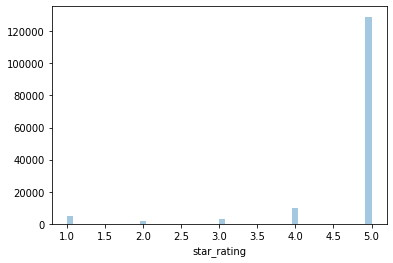

In [118]:
products_reviews = pd.read_csv('/Users/Lfear/PycharmProjects/ML_Assignment_110/amazon_reviews_us_Gift_Card_v1_00.tsv', sep='\t')


#print(products_reviews['star_rating'])
#a = [2, 0, 0, 0, 0]
# for i in products_reviews['star_rating']:
#     a[i-1] = a[i-1] + 1
#print(a)


sns.distplot(a=products_reviews['star_rating'], kde=False)

# (b) 

In [119]:
#print(len(products_reviews['review_body'][0]))
#print(products_reviews.loc[0:10, ['star_rating', 'verified_purchase', 'review_body']])


Length_review = []
for reviews in products_reviews['review_body']:
    Length_review.append(len(str(reviews)))

Verified_purchase = []
for veri in products_reviews['verified_purchase']:
    if veri == 'Y':
        veri = 1
    else:
        veri = 0
    Verified_purchase.append(veri)
    
Star_rating = []
for rate in products_reviews['star_rating']:
    Star_rating.append(rate)


X1 = np.array(Verified_purchase)
X2 = np.array(Length_review)

X = np.vstack((X1, X2))
X = X.transpose()

y = np.array(Star_rating)
y = y.transpose()

print(y[0:10])
print(X[1:10])

reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)

# print(Verified_purchase[20:100])
# print(Length_review[1:10])


[5 5 5 1 5 5 5 5 1 5]
[[  1 101]
 [  1   4]
 [  1   4]
 [  1  76]
 [  1  94]
 [  1   8]
 [  1  26]
 [  1  13]
 [  1  37]]
4.845035348553754 [ 0.04985775 -0.00124546]


So from the regression above, we've got $\theta _0 =4.84503, \theta_1 = 0.04985, \theta_2 = -0.00125 $
and we can conclude that the star rating has positive relation with the verified_peuchase and slight negative relation with length of review


# (c) 

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9)

# print(X_train[1:10])
# print(X_test[1:10])
# print(y_train[1:10])
# print(y_test[1:10])

reg = LinearRegression().fit(X_train, y_train)
print(reg.intercept_, reg.coef_)
theta_0 = reg.intercept_
theta_1 = reg.coef_[0]
theta_2 = reg.coef_[1]
#print(X_train[:,0])

y_pred = theta_0 + theta_1*X_train[:, 0] + theta_2 * X_train[:, 1]

y_test_pred = theta_0 + theta_1*X_test[:, 0] + theta_2 * X_test[:, 1]

print(mean_squared_error(y_train, y_pred))
print(mean_squared_error(y_test, y_test_pred))


4.843296221717328 [ 0.04954969 -0.00123217]
0.6515045472283107
0.6450115244787632


As what we've senn above, We've split the data into 90% and 10% for train and test. And the MSE of train and test are $\sigma_{train}^2 = 0.648711 $ and $ \sigma_{test}^2 = 0.670139$

# (d)
We assume a regression model as $y = \theta_0 + \theta_1 X_1 + \theta_2X_2^2$


In [139]:
X2 = np.array(X2)
X2_2 = X2*X2
#print(X2_2)

X_new = np.vstack((X1, X2_2))
X_new = X_new.transpose()


X_train_2, X_test_2, y_train, y_test = train_test_split(X_new,y,train_size=0.9)
#y_pred_2 = theta_0 + theta_1*X_train[:, 0] + theta_2 * X_train[:, 1]

reg = LinearRegression().fit(X_train_2, y_train)
print(reg.intercept_, reg.coef_)
theta_0 = reg.intercept_
theta_1 = reg.coef_[0]
theta_2 = reg.coef_[1]

y_pred_2 = theta_0 + theta_1*X_train_2[:, 0] + theta_2 * X_train_2[:, 1]

y_test_pred_2 = theta_0 + theta_1*X_test_2[:, 0] + theta_2 * X_test_2[:, 1]

print(mean_squared_error(y_train, y_pred_2))
print(mean_squared_error(y_test, y_test_pred_2))

4.5845457045663585 [ 1.67199340e-01 -1.25402168e-07]
0.6811391688262237
0.6929237605299587


In the second order model, we got $\theta _0 =4.591878, \theta_1 = 1.586071\times10^{-1}, \theta_2 = -1.236320\times10^{-7} $
And the MSE of train and test are $\sigma_{train}^2 = 0.681139 $ and $ \sigma_{test}^2 = 0.692923$